#### Load data from large analysis and get summaries to plot 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

In [35]:
# plot results from Simulation scripts/SBR_simulation.py
loaded_data = load('/u/ruizsuar/InformedML-CV/Environments/IF_Nov26.pkl')# 21
globals().update(loaded_data)

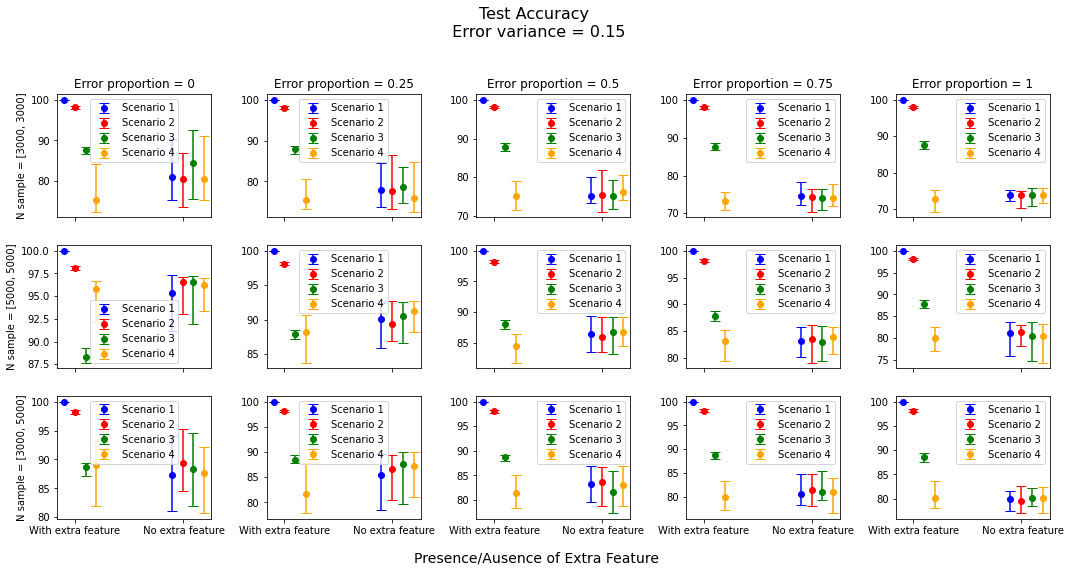

In [36]:
quantiles = [0.2, 0.5, 0.8]  # 10th, 50th, and 90th percentiles
quantile_array = np.quantile(accuracy_test, q=quantiles, axis=4)
quantile_ce = np.quantile(ce_test, q=quantiles, axis=4)

x_offsets = [-0.1, 0.0, 0.1, 0.2]  # Offsets for each plot on the x-axis
binary_f = ['With extra feature',' No extra feature']
colors = np.array(['blue','red','green','orange'])

fig, axes = plt.subplots(len(n_samples),len(noise_prop), figsize=(15, 8))

fig.suptitle(f'Test Accuracy \n Error variance = {var_error}' , fontsize=16)
fig.supxlabel("Presence/Ausence of Extra Feature", fontsize=14)

# # Optionally, add a general y-axis label
# fig.supylabel("General Y-Axis Label", fontsize=14)


for m in range (len(noise_prop)):
    for n in range (len(n_samples)):
        for i in range(len(mu_s)):
            lower_errors = quantile_array[1,n,i,m,] - quantile_array[0,n,i,m,]
            upper_errors = quantile_array[2,n,i,m,] - quantile_array[1,n,i,m,]

            # Combine the lower and upper errors in a single array
            asymmetric_error = [lower_errors, upper_errors]
            adjusted_x =  np.array([0,1]) + np.array(x_offsets[i])

            axes[n,m].errorbar(adjusted_x, quantile_array[1,n,i,m,], 
                        yerr= asymmetric_error, fmt='o', capsize=5, color= colors[i],
                        label=f'Scenario {i+1}')
            axes[n,m].legend()
            axes[n,m].set_xticks(np.array([0,1]), ['',' '])
            if (n==0):
                axes[n,m].set(title=f'Error proportion = {noise_prop[m]}')
            if (m==0):
                axes[n,m].set(ylabel=f'N sample = {n_samples[n]}')
            if (n==(len(n_samples)-1)):
                axes[n,m].set_xticks(np.array([0,1]), ['With extra feature',' No extra feature'])
                    
                
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for titles



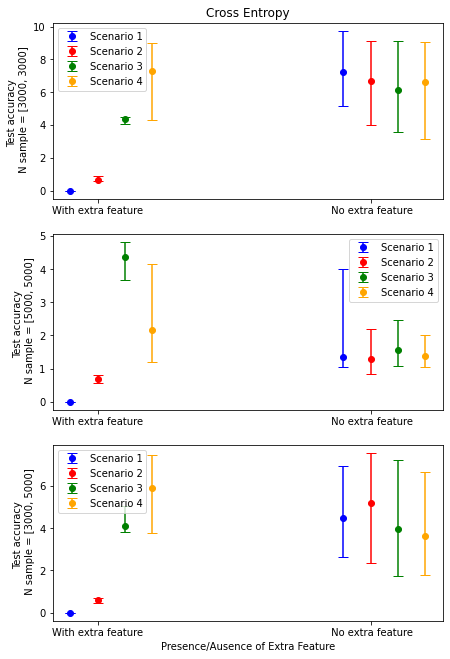

In [27]:
# Cross Entropy
fig, axes = plt.subplots(len(n_samples), figsize=(7, 11))

for n in range (len(n_samples)):
    for i in range(len(mu_s)):
        lower_errors = quantile_ce[1,n,i,] - quantile_ce[0,n,i,]
        upper_errors = quantile_ce[2,n,i,] - quantile_ce[1,n,i,]

        # Combine the lower and upper errors in a single array
        asymmetric_error = [lower_errors, upper_errors]
        adjusted_x =  np.array([0,1]) + np.array(x_offsets[i])


        axes[n].errorbar(adjusted_x, quantile_ce[1,n,i,], 
                    yerr= asymmetric_error, fmt='o', capsize=5, color= colors[i],
                    label=f'Scenario {i+1}')

        axes[n].set_xticks(np.array([0,1]), ['With extra feature',' No extra feature'])
        axes[n].set(ylabel=f'Test accuracy \n N sample = {n_samples[n]}')
        axes[n].legend()

        if n==0:
            axes[n].set_title('Cross Entropy')
        if n==2:    
            axes[n].set(xlabel='Presence/Ausence of Extra Feature')